# A computational introduction to stochastic differential equations.

Lecture 5.

https://github.com/spdes/computational-sde-intro-lecture.

Mean and covariance of Ornstein--Uhlenbeck process.

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

np.random.seed(666)

In [13]:
# Parameters
theta, sigma = 1., 1.

# The stationary variance
stationary_variance = sigma ** 2 / (2 * theta)

# Solution to the mean-cov ODEs
def mean(t, m0):
    return np.exp(-theta * t) * m0

def variance(t, variance0):
    return variance0 * np.exp(-2 * theta * t) + sigma ** 2 / (2 * theta) * (1 - np.exp(-2 * theta * t))

Let us draw trajectories starting from any initial condition, not the stationary one!

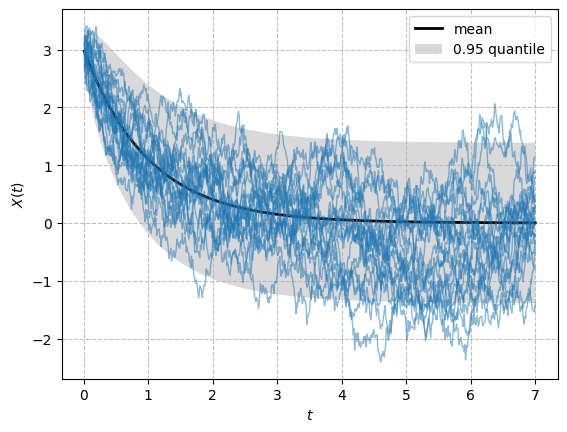

In [14]:
# The initial mean and variance
m0, P0 = 3., 0.01

# Number of trajectories
num_samples = 20

# Times
dt = 0.01
T = 700
ts = np.linspace(dt, dt * T, T)

samples = np.zeros((num_samples, T))

# Draw trajectories by Normal increments
for mc in range(num_samples):
    x0 = m0 + math.sqrt(P0) * np.random.randn()
    x = x0
    for k in range(T):
        x = mean(dt, x) + np.sqrt(variance(dt, 0.)) * np.random.randn()
        samples[mc, k] = x

plt.plot(ts, mean(ts, m0), linewidth=2, c='black', label='mean')
plt.fill_between(ts,
                 mean(ts, m0) - 1.96 * np.sqrt(variance(ts, P0)),
                 mean(ts, m0) + 1.96 * np.sqrt(variance(ts, P0)),
                 color='black',
                 edgecolor='none',
                 alpha=0.15,
                 label='0.95 quantile')
_ = plt.plot(ts, samples.T, linewidth=1, alpha=0.5, c='tab:blue')

plt.grid(linestyle='--', alpha=0.8, which='both')
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
_ = plt.legend()

Now let's draw trajectories starting from the **statioanry** condition.

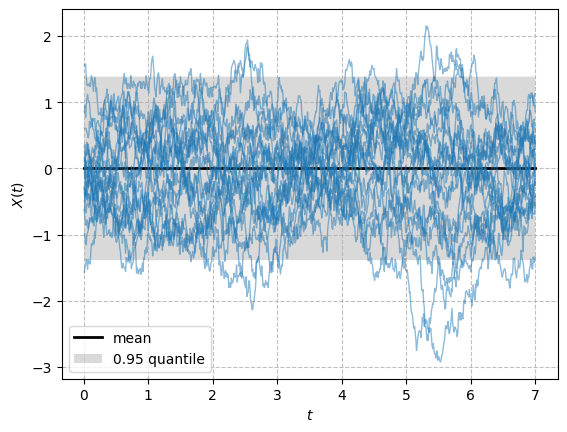

In [15]:
# Stationary mean and variance
m0, P0 = 0., stationary_variance

num_samples = 20

dt = 0.01
T = 700
ts = np.linspace(dt, dt * T, T)

samples = np.zeros((num_samples, T))

for mc in range(num_samples):
    x0 = m0 + math.sqrt(P0) * np.random.randn()
    x = x0
    for k in range(T):
        x = mean(dt, x) + np.sqrt(variance(dt, 0.)) * np.random.randn()
        samples[mc, k] = x

plt.plot(ts, mean(ts, m0), linewidth=2, c='black', label='mean')
plt.fill_between(ts,
                 mean(ts, m0) - 1.96 * np.sqrt(variance(ts, P0)),
                 mean(ts, m0) + 1.96 * np.sqrt(variance(ts, P0)),
                 color='black',
                 edgecolor='none',
                 alpha=0.15,
                 label='0.95 quantile')
_ = plt.plot(ts, samples.T, linewidth=1, alpha=0.5, c='tab:blue')

plt.grid(linestyle='--', alpha=0.8, which='both')
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
_ = plt.legend()